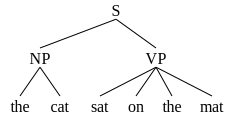

In [57]:
import nltk
from nltk.tree import Tree
prp = Tree

chunked = Tree("S", [Tree("NP", ["the", "cat"]), Tree("VP", ["sat", "on", "the", "mat"])])
chunked

In [58]:
PRP = Tree("PRP", ["I"])
VBD = Tree("VBD", ["met"])
N1 = Tree("NN", ["bill"])

NP1 = Tree("NP", [PRP])
NP = Tree("NP", [N1])
VP = Tree("VP", [VBD, NP])

S= Tree("s", [NP1, VP])

print(S)

(s (NP (PRP I)) (VP (VBD met) (NP (NN bill))))


In [59]:
S = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))")
print(S)

(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))


In [60]:
from nltk.corpus import treebank

# The function parsed_sents() returns the syntax trees in the treebank.
syntax_trees = treebank.parsed_sents()


In [61]:
from collections import Counter

def iterate_tree(t, ls=[]):
    """
    Recursively iterate through all nodes in a tree.
    """
    if isinstance(t, Tree) and t.height() > 2:
        print(t.label(), "---------")
        for child in t:
            iterate_tree(child, ls)
    else:
        ls.append(t.leaves()[0])
        
    return ls 

Counter(iterate_tree(treebank.parsed_sents()[11], [])).most_common(10)

SINV ---------
S-TPC-1 ---------
NP-SBJ ---------
VP ---------
NP ---------
NP ---------
PP ---------
SBAR ---------
S ---------
NP-SBJ ---------
VP ---------
PP-PRD ---------
NP ---------
VP ---------
S ---------
NP-SBJ ---------
NP ---------
PP ---------
NP ---------
NP ---------


[('``', 1),
 ('We', 1),
 ('have', 1),
 ('no', 1),
 ('useful', 1),
 ('information', 1),
 ('on', 1),
 ('whether', 1),
 ('users', 1),
 ('are', 1)]

In [62]:
for phrase in S.subtrees():
    print(phrase)
    print("---")

(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))
---
(NP (PRP I))
---
(PRP I)
---
(VP (VBD met) (NP (NN Bill)))
---
(VBD met)
---
(NP (NN Bill))
---
(NN Bill)
---


In [63]:
for phrase in S:
    print(phrase)
    print("---")

(NP (PRP I))
---
(VP (VBD met) (NP (NN Bill)))
---


In [64]:
S = Tree.fromstring("(S (NP (PRP I)) (VP (VBD met) (NP (NN Bill))) (NP (PRP I)) (VP (VBD met) (NP (NN Bill))))")
S.leaves()

['I', 'met', 'Bill', 'I', 'met', 'Bill']

In [65]:
print(S.flatten())

(S I met Bill I met Bill)


In [66]:
np = Tree("NP", [("I", "PRP")])
vp = Tree("VP", [("met", "VBD"), ("NP", [("Bill", "NN")])])

S= Tree("s", [NP1, VP])
print(S)

(s (NP (PRP I)) (VP (VBD met) (NP (NN bill))))


In [67]:
from nltk.corpus import treebank
syntax = treebank.parsed_sents()[0]
print(syntax)

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))


In [68]:
for phrase in syntax:
    print(phrase.label())

NP-SBJ
VP
.


In [69]:
for phrase in syntax:
    print(phrase,"--------------")

(NP-SBJ
  (NP (NNP Pierre) (NNP Vinken))
  (, ,)
  (ADJP (NP (CD 61) (NNS years)) (JJ old))
  (, ,)) --------------
(VP
  (MD will)
  (VP
    (VB join)
    (NP (DT the) (NN board))
    (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
    (NP-TMP (NNP Nov.) (CD 29)))) --------------
(. .) --------------


In [70]:
print(syntax.leaves())

['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']


In [71]:
for phrase in syntax.subtrees():
    print(phrase)
    print("--------------")
    break

(S
  (NP-SBJ
    (NP (NNP Pierre) (NNP Vinken))
    (, ,)
    (ADJP (NP (CD 61) (NNS years)) (JJ old))
    (, ,))
  (VP
    (MD will)
    (VP
      (VB join)
      (NP (DT the) (NN board))
      (PP-CLR (IN as) (NP (DT a) (JJ nonexecutive) (NN director)))
      (NP-TMP (NNP Nov.) (CD 29))))
  (. .))
--------------


In [72]:
print(syntax.flatten())

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .)


In [73]:
def extract_phrases_from_sent(sentence, phrase_type):
    tokens = []
    for phrase in sentence:
        if phrase.label() == phrase_type:
            tokens.extend([tok.lower() for tok in phrase.leaves() if not "*" in tok])
        elif phrase.height() > 2:
            print(phrase.flatten(), phrase_type, "--------------------------")
            tokens.extend(extract_phrases_from_sent(phrase, phrase_type))
    return tokens

def extract_phrases(treebank, phrase_type):
    tokens = []
    #for s in treebank:
    tokens.extend(extract_phrases_from_sent(treebank,phrase_type))
    return tokens

from collections import Counter
first_sentence = treebank.parsed_sents()[:1]
np_sbj_types = Counter(extract_phrases(first_sentence,"NP-SBJ"))

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .) NP-SBJ --------------------------
(VP will join the board as a nonexecutive director Nov. 29) NP-SBJ --------------------------
(VP join the board as a nonexecutive director Nov. 29) NP-SBJ --------------------------
(NP the board) NP-SBJ --------------------------
(PP-CLR as a nonexecutive director) NP-SBJ --------------------------
(NP a nonexecutive director) NP-SBJ --------------------------
(NP-TMP Nov. 29) NP-SBJ --------------------------


In [74]:
np_sbj_types

Counter({'pierre': 1, 'vinken': 1, ',': 2, '61': 1, 'years': 1, 'old': 1})

In [75]:
np_sbj_types

Counter({'pierre': 1, 'vinken': 1, ',': 2, '61': 1, 'years': 1, 'old': 1})

In [76]:
np_sbj_types = Counter(extract_phrases(first_sentence,"NP"))
np_sbj_types

(S
  Pierre
  Vinken
  ,
  61
  years
  old
  ,
  will
  join
  the
  board
  as
  a
  nonexecutive
  director
  Nov.
  29
  .) NP --------------------------
(NP-SBJ Pierre Vinken , 61 years old ,) NP --------------------------
(ADJP 61 years old) NP --------------------------
(VP will join the board as a nonexecutive director Nov. 29) NP --------------------------
(VP join the board as a nonexecutive director Nov. 29) NP --------------------------
(PP-CLR as a nonexecutive director) NP --------------------------
(NP-TMP Nov. 29) NP --------------------------


Counter({'pierre': 1,
         'vinken': 1,
         '61': 1,
         'years': 1,
         'the': 1,
         'board': 1,
         'a': 1,
         'nonexecutive': 1,
         'director': 1})

In [77]:
#Tree.fromstring(first_sentence)

In [78]:
tree = Tree.fromstring("(S (NP (DT The) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))")
tree.pos()

[('The', 'DT'), ('dog', 'NN'), ('saw', 'VBD'), ('the', 'DT'), ('cat', 'NN')]

In [79]:
# your code here
def flatten_nps(tree):
    
    if tree.height() == 2:
        print("=====================", tree.pos()[0])
        return tree.pos()[0]
    elif tree.label() == "NP":
        print("-----------------------------------------------------------------", tree.pos())
        return Tree("NP",tree.pos())
    else: 
        print("+++++++++++++++++++", tree)
        return Tree(tree.label(),[flatten_nps(node) for node in tree])

print(flatten_nps(tree))

+++++++++++++++++++ (S (NP (DT The) (NN dog)) (VP (VBD saw) (NP (DT the) (NN cat))))
----------------------------------------------------------------- [('The', 'DT'), ('dog', 'NN')]
+++++++++++++++++++ (VP (VBD saw) (NP (DT the) (NN cat)))
===================== ('saw', 'VBD')
----------------------------------------------------------------- [('the', 'DT'), ('cat', 'NN')]
(S (NP The/DT dog/NN) (VP saw/VBD (NP the/DT cat/NN)))


In [80]:
import nltk
from nltk.tree import Tree

In [81]:
np  = Tree("NP", ["the", "cat"])

In [82]:
vp  = Tree("VP", ["sat", "on", "the","mat"])

In [83]:
tree = Tree("S", [np,vp])

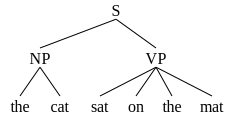

In [84]:
tree

In [85]:
s = "i saw a grey cat"
from nltk import RegexpParser

from nltk import pos_tag, word_tokenize

tagged_sent = pos_tag(word_tokenize(s))

In [86]:
vp_chunk = RegexpParser("VP: {<VB.*><DT>?<JJ>?<NN>}")

In [87]:

print(vp_chunk.parse(tagged_sent))

(S i/NN (VP saw/VBD a/DT grey/JJ cat/NN))


In [88]:
#q1
import nltk
from nltk import CFG

def is_cnf(grammar_rule):
    for prod in grammar_rule.productions():
        rhs = prod.rhs()
        if len(rhs) == 2:
            if not all(isinstance(x, nltk.grammar.Nonterminal) for x in rhs):
                return False
        elif len(rhs) == 1:
            if not isinstance(rhs[0], str):
                return False
        else:
            return False
    return True

grammar_rule = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> Det N
  VP -> V NP
  Det -> 'the'
  N -> 'dog' | 'cat'
  V -> 'chased' | 'saw'
""")

print(is_cnf(grammar_rule)) # Output: True


True


In [89]:
#q2
import nltk
from nltk import CFG

def to_cnf(grammar):
    # Step 1: Replace all terminals on the RHS of a production with a unique non-terminal.
    new_productions = []
    for production in grammar.productions():
        rhs = production.rhs()
        if len(rhs) == 1 and isinstance(rhs[0], str):
            new_nonterminal = nltk.grammar.Nonterminal("T_" + rhs[0])
            new_production = nltk.grammar.Production(production.lhs(), (new_nonterminal,))
            new_productions.append(new_production)
            new_production = nltk.grammar.Production(new_nonterminal, (rhs[0],))
            new_productions.append(new_production)
        else:
            new_productions.append(production)
    grammar = CFG(grammar.start(), new_productions)
    
    # Step 2: Split any production with more than two symbols on the RHS into multiple productions.
    new_productions = []
    for production in grammar.productions():
        rhs = production.rhs()
        if len(rhs) > 2:
            nonterminal = nltk.grammar.Nonterminal(str(production.lhs()) + "_" + str(rhs[0]))
            new_production = nltk.grammar.Production(production.lhs(), (nonterminal,))
            new_productions.append(new_production)
            for i in range(len(rhs) - 1):
                nonterminal = nltk.grammar.Nonterminal(str(production.lhs()) + "_" + str(rhs[i]))
                new_production = nltk.grammar.Production(nonterminal, (rhs[i], rhs[i + 1]))
                new_productions.append(new_production)
        else:
            new_productions.append(production)
    grammar = CFG(grammar.start(), new_productions)
    return grammar

grammar = nltk.CFG.fromstring("""
  S -> NP VP
  NP -> Det Adj N
  VP -> V NP
  Det -> 'the'
  Adj -> 'big' | 'little'
  N -> 'dog' | 'cat'
  V -> 'chased' | 'saw'
""")

cnf_grammar = to_cnf(grammar)
print(cnf_grammar)


Grammar with 19 productions (start state = S)
    S -> NP VP
    NP -> NP_Det
    NP_Det -> Det Adj
    NP_Adj -> Adj N
    VP -> V NP
    Det -> T_the
    T_the -> 'the'
    Adj -> T_big
    T_big -> 'big'
    Adj -> T_little
    T_little -> 'little'
    N -> T_dog
    T_dog -> 'dog'
    N -> T_cat
    T_cat -> 'cat'
    V -> T_chased
    T_chased -> 'chased'
    V -> T_saw
    T_saw -> 'saw'


In [90]:
#Compute UAS and LAS

def compute_uas(predicted_heads, true_heads):
    correct_heads = sum([1 for p, t in zip(predicted_heads, true_heads) if p == t])
    return correct_heads / len(true_heads)

def compute_las(predicted_heads, predicted_labels, true_heads, true_labels):
    correct_heads = sum([1 for p, t in zip(predicted_heads, true_heads) if p == t])
    correct_labels = sum([1 for p_h, p_l, t_h, t_l in zip(predicted_heads, predicted_labels, true_heads, true_labels) if p_h == t_h and p_l == t_l])
    return correct_labels / len(true_heads)

predicted_heads = [1, 2, 3, 4, 5]
true_heads = [1, 2, 3, 4, 6]
predicted_labels = ['NP', 'VP', 'NP', 'VP', 'NP']
true_labels = ['NP', 'VP', 'NP', 'VP', 'ADJP']

uas = compute_uas(predicted_heads, true_heads)
las = compute_las(predicted_heads, predicted_labels, true_heads, true_labels)

print("UAS:", uas)
print("LAS:", las)

UAS: 0.8
LAS: 0.8
